In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("ex2data2.txt", header=None)
data.columns = ["Test1", "Test2", "Accepted"]

In [8]:
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


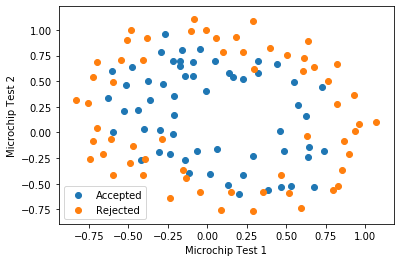

In [189]:
def plot_data(data):
    plt.scatter(data[data["Accepted"] == 1]["Test1"], data[data["Accepted"] == 1]["Test2"], label="Accepted")
    plt.scatter(data[data["Accepted"] == 0]["Test1"], data[data["Accepted"] == 0]["Test2"], label="Rejected")
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    plt.legend(loc="lower left")
    
plot_data(data)

In [155]:
def map_feature(X1, X2):
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [159]:
def init_data(data):
    X = data[["Test1", "Test2"]]
    y = data["Accepted"]
    
    X = map_feature(X["Test1"], X["Test2"])
    
    theta = np.zeros(len(X[0]))
    m = len(y)
    
    return X, y, theta, m

X, y, theta, m = init_data(data)

In [160]:
def sigmoid(num):
    return 1 / (1 + np.exp(-num))

sigmoid(0)

0.5

#### Regularised Cost Function

![alt text](regularized_cost_function.PNG "Title")

In [164]:
X, y, theta, m = init_data(data)
lr = 0

def calculate_cost(X, y, theta, m):
    h = sigmoid(np.dot(X, theta))

    J = (1 / m) * np.sum((-y * np.log(h)) - ((1 - y) * np.log(1 - h)))
    reg = lr / (2 * m) * np.sum(theta ** 2)

    J = J + reg

    return J

calculate_cost(X, y, theta, m)

0.6931471805599454

#### Regularised Gradient Descent

![alt text](regularized_gradient_j_0.PNG "Title")
![alt text](regularized_gradient_j_larger.PNG "Title")


In [235]:
def gradient_descent(X, y, theta, m, alpha, lr):
    h = sigmoid(np.dot(X, theta))

    grads = (1 / m) * np.dot(X.T, (h - y))

    reg = (lr / m) * theta
    reg[0] = 0

    grads = grads + reg
    
    theta = theta - alpha * grads
    
    return theta

X, y, theta, m = init_data(data)

alpha = 10
iterations = 10000
lr = 0

for i in range(iterations):
    theta = gradient_descent(X, y, theta, m, alpha, lr)
    J = calculate_cost(X, y, theta, m)
    
    print(J)

theta

0.6457141922500386
0.6971650047293896
0.9420618042076725
1.00388264304877
1.1950262155217704
0.8228609628810007
0.8576918314764219
0.7526592154784572
0.747058282545047
0.6696671991888412
0.6444427219754205
0.5896175849767629
0.559406353600294
0.5205238036558544
0.49348977583149994
0.46657011773431184
0.44613249865799404
0.4283589867806579
0.41463418428212384
0.40354765853201835
0.3950613908944712
0.3884581699306318
0.38342930019876226
0.37954139899689676
0.3765280345587161
0.3741355172639459
0.3721941863519604
0.3705692611242093
0.3691693658625051
0.36792953873895023
0.366806062216548
0.3657698960744583
0.36480158193061285
0.36388849174719673
0.36302196504984596
0.3621961734844404
0.36140683316409095
0.3606507738134103
0.3599254305699148
0.35922869512028566
0.3585587292703941
0.3579139151091596
0.3572927868584693
0.35669401168081394
0.356116362253099
0.3555587065136238
0.3550199942682574
0.3544992499732089
0.3539955646597483
0.3535080902788134
0.3530360340580036
0.35257865395852434
0.3

0.32012184067940624
0.320103516008418
0.3200852343302569
0.32006699545150397
0.320048799179888
0.3200306453242766
0.32001253369466764
0.31999446410218163
0.3199764363590527
0.3199584502786216
0.319940505675326
0.31992260236469433
0.3199047401633365
0.3198869188889366
0.31986913836024533
0.31985139839707194
0.31983369882027674
0.3198160394517638
0.3197984201144725
0.3197808406323715
0.31976330083045046
0.31974580053471274
0.3197283395721688
0.31971091777082805
0.3196935349596928
0.3196761909687508
0.31965888562896766
0.31964161877228103
0.3196243902315928
0.31960719984076275
0.31959004743460195
0.3195729328488655
0.3195558559202467
0.31953881648636945
0.31952181438578325
0.3195048494579547
0.31948792154326305
0.3194710304829931
0.31945417611932797
0.3194373582953449
0.31942057685500685
0.3194038316431583
0.3193871225055179
0.31937044928867253
0.319353811840072
0.3193372100080232
0.31932064364168256
0.3193041125910528
0.3192876167069749
0.3192711558411234
0.31925472984600084
0.3192383385

0.3139785982464984
0.31397001576957856
0.31396144151424904
0.31395287546182044
0.3139443175936717
0.31393576789124944
0.3139272263360677
0.3139186929097074
0.3139101675938161
0.3139016503701081
0.31389314122036355
0.3138846401264287
0.313876147070215
0.31386766203369953
0.31385918499892423
0.31385071594799524
0.31384225486308376
0.3138338017264248
0.3138253565203166
0.3138169192271222
0.31380848982926635
0.31380006830923773
0.3137916546495875
0.3137832488329289
0.3137748508419378
0.31376646065935104
0.3137580782679678
0.31374970365064825
0.3137413367903134
0.31373297766994507
0.31372462627258574
0.31371628258133777
0.3137079465793634
0.313699618249885
0.31369129757618375
0.31368298454160026
0.31367467912953384
0.31366638132344254
0.31365809110684256
0.3136498084633083
0.3136415333764718
0.3136332658300231
0.31362500580770897
0.3136167532933337
0.31360850827075804
0.31360027072389957
0.31359204063673174
0.31358381799328455
0.31357560277764357
0.31356739497394986
0.3135591945663999
0.313

0.3104105452487055
0.3104046518326095
0.31039876194098776
0.3103928755694953
0.3103869927137968
0.31038111336956625
0.3103752375324875
0.31036936519825375
0.31036349636256716
0.3103576310211402
0.31035176916969426
0.3103459108039599
0.3103400559196772
0.31033420451259586
0.3103283565784743
0.31032251211308043
0.31031667111219136
0.31031083357159334
0.3103049994870818
0.31029916885446146
0.31029334166954586
0.31028751792815784
0.31028169762612895
0.31027588075929996
0.3102700673235208
0.31026425731465
0.310258450728555
0.3102526475611126
0.310246847808208
0.31024105146573533
0.3102352585295977
0.3102294689957069
0.31022368285998336
0.31021790011835626
0.3102121207667637
0.31020634480115217
0.31020057221747704
0.3101948030117022
0.3101890371797999
0.3101832747177513
0.310177515621546
0.3101717598871818
0.31016600751066564
0.31016025848801204
0.31015451281524503
0.31014877048839573
0.3101430315035048
0.31013729585662053
0.31013156354380006
0.31012583456110815
0.31012010890461855
0.3101143

0.3080014221354021
0.30799681056056705
0.3079922011773738
0.3079875939839119
0.30798298897827425
0.30797838615855655
0.30797378552285654
0.3079691870692755
0.30796459079591687
0.307959996700887
0.3079554047822949
0.3079508150382522
0.3079462274668733
0.3079416420662753
0.30793705883457795
0.30793247776990346
0.307927898870377
0.30792332213412626
0.3079187475592818
0.3079141751439762
0.30790960488634544
0.30790503678452774
0.3079004708366638
0.30789590704089703
0.30789134539537394
0.3078867858982429
0.3078822285476555
0.3078776733417655
0.30787312027872954
0.3078685693567066
0.3078640205738583
0.30785947392834917
0.3078549294183456
0.3078503870420174
0.30784584679753635
0.30784130868307685
0.3078367726968158
0.30783223883693317
0.3078277071016109
0.30782317748903343
0.3078186499973882
0.3078141246248648
0.3078096013696554
0.3078050802299546
0.3078005612039597
0.3077960442898705
0.30779152948588917
0.3077870167902201
0.3077825062010708
0.30777799771665054
0.30777349133517173
0.3077689870

0.30590933827919425
0.3059056391644297
0.30590194152854155
0.30589824537049426
0.3058945506892539
0.3058908574837872
0.3058871657530619
0.3058834754960471
0.30587978671171284
0.30587609939903004
0.30587241355697103
0.3058687291845089
0.30586504628061806
0.30586136484427373
0.30585768487445236
0.30585400637013144
0.30585032933028933
0.3058466537539057
0.3058429796399611
0.30583930698743744
0.3058356357953171
0.3058319660625837
0.30582829778822246
0.30582463097121915
0.30582096561056027
0.3058173017052342
0.3058136392542296
0.30580997825653655
0.3058063187111462
0.3058026606170503
0.3057990039732422
0.30579534877871595
0.30579169503246667
0.30578804273349075
0.3057843918807851
0.3057807424733481
0.3057770945101789
0.305773447990278
0.3057698029126464
0.30576615927628675
0.3057625170802021
0.30575887632339666
0.3057552370048763
0.305751599123647
0.30574796267871623
0.30574432766909243
0.3057406940937848
0.30573706195180406
0.30573343124216135
0.3057298019638693
0.3057261741159412
0.305722

0.3042313811801997
0.3042283089669157
0.3042252378233413
0.304222167748827
0.3042190987427241
0.3042160308043844
0.30421296393316016
0.30420989812840443
0.3042068333894704
0.3042037697157121
0.30420070710648395
0.30419764556114126
0.3041945850790396
0.304191525659535
0.3041884673019842
0.30418541000574434
0.3041823537701736
0.30417929859463
0.30417624447847275
0.304173191421061
0.3041701394217548
0.304167088479915
0.3041640385949023
0.3041609897660785
0.3041579419928058
0.304154895274447
0.30415184961036507
0.30414880499992397
0.30414576144248834
0.30414271893742245
0.3041396774840921
0.3041366370818632
0.3041335977301023
0.30413055942817624
0.30412752217545264
0.3041244859712999
0.304121450815086
0.30411841670618084
0.30411538364395385
0.304112351627775
0.3041093206570153
0.3041062907310461
0.3041032618492391
0.30410023401096686
0.30409720721560207
0.3040941814625183
0.30409115675108944
0.30408813308069
0.30408511045069486
0.3040820888604797
0.3040790683094207
0.3040760487968941
0.304

0.3027697299261152
0.30276713601540545
0.302764542900052
0.30276195057962546
0.30275935905369705
0.3027567683218376
0.3027541783836186
0.302751589238612
0.30274900088638984
0.3027464133265247
0.30274382655858917
0.3027412405821563
0.3027386553967999
0.3027360710020931
0.3027334873976105
0.30273090458292606
0.30272832255761467
0.3027257413212513
0.3027231608734113
0.3027205812136701
0.3027180023416039
0.30271542425678893
0.3027128469588015
0.30271027044721893
0.3027076947216181
0.3027051197815766
0.30270254562667226
0.30269997225648343
0.30269739967058834
0.30269482786856594
0.30269225684999523
0.30268968661445567
0.3026871171615269
0.302684548490789
0.30268198060182244
0.30267941349420757
0.30267684716752574
0.3026742816213579
0.30267171685528593
0.3026691528688916
0.302666589661757
0.3026640272334648
0.3026614655835979
0.30265890471173923
0.30265634461747254
0.30265378530038134
0.30265122676004974
0.3026486689960622
0.3026461120080033
0.3026435557954581
0.30264100035801206
0.302638445

0.3016745657438565
0.3016722913625649
0.3016700176114006
0.3016677444900524
0.30166547199820953
0.3016632001355611
0.3016609289017966
0.3016586582966059
0.30165638831967895
0.3016541189707058
0.3016518502493769
0.3016495821553828
0.3016473146884142
0.3016450478481621
0.30164278163431796
0.3016405160465729
0.30163825108461856
0.30163598674814707
0.30163372303685
0.30163145995042007
0.30162919748854944
0.30162693565093096
0.30162467443725743
0.30162241384722205
0.30162015388051794
0.30161789453683874
0.3016156358158782
0.30161337771733004
0.3016111202408886
0.3016088633862483
0.3016066071531035
0.30160435154114906
0.30160209655007986
0.3015998421795913
0.3015975884293783
0.30159533529913696
0.3015930827885628
0.3015908308973519
0.30158857962520047
0.30158632897180493
0.30158407893686184
0.30158182952006807
0.30157958072112057
0.3015773325397168
0.30157508497555396
0.3015728380283299
0.3015705916977425
0.3015683459834895
0.3015661008852695
0.30156385640278077
0.301561612535722
0.301559369

0.3005524149761956
0.3005504351620022
0.30054845583907236
0.3005464770071856
0.30054449866612176
0.30054252081566096
0.3005405434555832
0.3005385665856686
0.30053659020569745
0.3005346143154506
0.30053263891470855
0.30053066400325196
0.3005286895808619
0.30052671564731914
0.3005247422024051
0.3005227692459011
0.30052079677758864
0.3005188247972492
0.30051685330466443
0.3005148822996164
0.30051291178188694
0.3005109417512581
0.30050897220751266
0.3005070031504323
0.3005050345798002
0.30050306649539865
0.3005010988970106
0.3004991317844189
0.3004971651574068
0.30049519901575733
0.30049323335925404
0.3004912681876801
0.3004893035008194
0.3004873392984557
0.30048537558037275
0.30048341234635456
0.3004814495961854
0.3004794873296496
0.3004775255465313
0.30047556424661526
0.3004736034296862
0.30047164309552893
0.3004696832439282
0.30046772387466947
0.30046576498753763
0.300463806582318
0.3004618486587965
0.30045989121675826
0.30045793425598943
0.3004559777762756
0.3004540217774028
0.30045206

0.2996459919119881
0.29964422686964576
0.2996424622259886
0.29964069798085174
0.29963893413407067
0.2996371706854808
0.29963540763491775
0.29963364498221684
0.2996318827272146
0.2996301208697459
0.2996283594096472
0.2996265983467545
0.2996248376809038
0.2996230774119313
0.2996213175396734
0.2996195580639664
0.29961779898464685
0.2996160403015515
0.2996142820145166
0.29961252412337946
0.29961076662797653
0.299609009528145
0.2996072528237217
0.2996054965145441
0.2996037406004492
0.29960198508127445
0.29960022995685703
0.29959847522703476
0.29959672089164535
0.29959496695052623
0.2995932134035154
0.29959146025045047
0.29958970749116975
0.29958795512551123
0.29958620315331297
0.2995844515744133
0.29958270038865065
0.2995809495958634
0.29957919919589016
0.29957744918856954
0.29957569957374025
0.2995739503512411
0.29957220152091113
0.29957045308258906
0.2995687050361146
0.29956695738132616
0.2995652101180635
0.29956346324616595
0.29956171676547294
0.29955997067582396
0.29955822497705875
0.29

0.2988401899594783
0.29883859927752066
0.29883700892482007
0.2988354189012506
0.2988338292066862
0.2988322398410008
0.2988306508040689
0.2988290620957643
0.2988274737159615
0.29882588566453494
0.298824297941359
0.2988227105463081
0.29882112347925677
0.2988195367400797
0.29881795032865155
0.2988163642448471
0.2988147784885412
0.29881319305960863
0.29881160795792466
0.2988100231833639
0.29880843873580176
0.2988068546151133
0.2988052708211736
0.2988036873538582
0.29880210421304226
0.2988005213986014
0.29879893891041104
0.2987973567483466
0.298795774912284
0.2987941934020987
0.29879261221766645
0.29879103135886326
0.2987894508255649
0.2987878706176473
0.29878629073498636
0.2987847111774586
0.29878313194493983
0.2987815530373065
0.2987799744544347
0.2987783961962009
0.2987768182624813
0.29877524065315286
0.29877366336809186
0.29877208640717473
0.29877050977027847
0.2987689334572796
0.2987673574680551
0.2987657818024819
0.2987642064604367
0.2987626314417969
0.29876105674643916
0.298759482374

0.29806764631906774
0.29806620883941104
0.29806477163249684
0.29806333469822854
0.2980618980365093
0.29806046164724265
0.29805902553033187
0.29805758968568064
0.29805615411319214
0.2980547188127703
0.29805328378431856
0.2980518490277405
0.2980504145429399
0.2980489803298205
0.29804754638828634
0.298046112718241
0.29804467931958833
0.29804324619223266
0.29804181333607743
0.2980403807510271
0.2980389484369858
0.29803751639385734
0.2980360846215462
0.29803465311995647
0.29803322188899234
0.29803179092855847
0.298030360238559
0.29802892981889834
0.29802749966948117
0.2980260697902117
0.2980246401809946
0.2980232108417349
0.2980217817723366
0.298020352972705
0.29801892444274436
0.29801749618235984
0.29801606819145626
0.2980146404699383
0.29801321301771116
0.29801178583467963
0.29801035892074895
0.298008932275824
0.2980075058998101
0.2980060797926124
0.2980046539541361
0.29800322838428644
0.2980018030829688
0.29800037805008855
0.29799895328555115
0.297997528789262
0.2979961045611267
0.297994

0.29735353616961696
0.29735222873368705
0.2973509215260043
0.2973496145464932
0.29734830779507904
0.2973470012716862
0.29734569497623997
0.29734438890866505
0.2973430830688865
0.2973417774568296
0.2973404720724189
0.29733916691558004
0.2973378619862378
0.29733655728431735
0.2973352528097441
0.297333948562443
0.2973326445423396
0.2973313407493591
0.29733003718342677
0.29732873384446784
0.29732743073240814
0.2973261278471727
0.2973248251886872
0.29732352275687707
0.297322220551668
0.2973209185729853
0.297319616820755
0.29731831529490244
0.2973170139953532
0.29731571292203324
0.29731441207486825
0.297313111453784
0.29731181105870613
0.29731051088956095
0.297309210946274
0.29730791122877126
0.2973066117369788
0.2973053124708224
0.29730401343022833
0.2973027146151225
0.2973014160254309
0.2973001176610801
0.2972988195219959
0.29729752160810446
0.29729622391933225
0.2972949264556053
0.29729362921685004
0.29729233220299295
0.2972910354139603
0.2972897388496783
0.2972884425100737
0.297287146395

0.2967340365403749
0.29673283335663336
0.2967316303678918
0.29673042757408996
0.2967292249751681
0.2967280225710659
0.29672682036172354
0.29672561834708094
0.29672441652707804
0.29672321490165504
0.2967220134707519
0.29672081223430896
0.29671961119226603
0.29671841034456353
0.2967172096911415
0.2967160092319403
0.2967148089669001
0.29671360889596105
0.29671240901906354
0.2967112093361481
0.29671000984715473
0.2967088105520241
0.2967076114506964
0.2967064125431121
0.2967052138292117
0.29670401530893575
0.29670281698222456
0.29670161884901886
0.296700420909259
0.2966992231628857
0.29669802560983966
0.29669682825006133
0.2966956310834913
0.29669443411007074
0.29669323732973973
0.29669204074243943
0.29669084434811055
0.2966896481466937
0.29668845213812983
0.29668725632235976
0.2966860606993243
0.29668486526896465
0.2966836700312212
0.29668247498603534
0.2966812801333478
0.2966800854730998
0.29667889100523226
0.29667769672968597
0.2966765026464025
0.29667530875532255
0.29667411505638747
0.2

0.29613780822521485
0.2961366982375906
0.2961355884171586
0.2961344787638703
0.296133369277678
0.29613225995853315
0.29613115080638774
0.2961300418211936
0.29612893300290266
0.29612782435146684
0.29612671586683803
0.29612560754896805
0.29612449939780927
0.2961233914133131
0.29612228359543197
0.29612117594411774
0.2961200684593224
0.29611896114099806
0.2961178539890972
0.2961167470035714
0.29611564018437286
0.29611453353145384
0.2961134270447665
0.296112320724263
0.29611121456989553
0.29611010858161635
0.2961090027593778
0.29610789710313185
0.296106791612831
0.2961056862884276
0.29610458112987387
0.29610347613712207
0.2961023713101246
0.2961012666488342
0.29610016215320273
0.29609905782318285
0.296097953658727
0.29609684965978766
0.2960957458263173
0.2960946421582684
0.29609353865559346
0.29609243531824503
0.2960913321461758
0.296090229139338
0.2960891262976846
0.29608802362116804
0.296086921109741
0.2960858187633561
0.29608471658196595
0.2960836145655234
0.2960825127139811
0.2960814110

0.29558210926737627
0.29558108014945367
0.2955800511761217
0.2955790223473409
0.29557799366307247
0.2955769651232773
0.2955759367279161
0.29557490847695006
0.29557388037034
0.29557285240804704
0.29557182459003206
0.29557079691625615
0.2955697693866804
0.2955687420012658
0.29556771475997334
0.2955666876627643
0.29556566070959955
0.2955646339004403
0.29556360723524766
0.2955625807139828
0.29556155433660697
0.29556052810308114
0.29555950201336667
0.29555847606742464
0.29555745026521624
0.2955564246067029
0.2955553990918458
0.2955543737206061
0.295553348492945
0.295552323408824
0.29555129846820427
0.2955502736710472
0.29554924901731416
0.29554822450696655
0.29554720013996555
0.2955461759162726
0.2955451518358493
0.2955441278986567
0.2955431041046565
0.29554208045381014
0.295541056946079
0.2955400335814246
0.29553901035980834
0.2955379872811918
0.2955369643455365
0.29553594155280394
0.29553491890295563
0.2955338963959532
0.2955328740317584
0.2955318518103325
0.29553082973163713
0.2955298077

0.29504454564330795
0.2950435895389672
0.295042633560081
0.29504167770661766
0.29504072197854525
0.2950397663758318
0.295038810898446
0.2950378555463558
0.29503690031952934
0.2950359452179352
0.2950349902415413
0.2950340353903161
0.2950330806642279
0.295032126063245
0.2950311715873355
0.29503021723646805
0.29502926301061083
0.29502830890973214
0.2950273549338005
0.2950264010827842
0.29502544735665137
0.2950244937553708
0.29502354027891076
0.2950225869272396
0.2950216337003258
0.2950206805981379
0.29501972762064427
0.2950187747678132
0.29501782203961346
0.2950168694360133
0.2950159169569814
0.2950149646024862
0.2950140123724961
0.29501306026697977
0.295012108285906
0.29501115642924275
0.29501020469695916
0.2950092530890234
0.29500830160540453
0.29500735024607067
0.2950063990109908
0.2950054479001331
0.29500449691346675
0.2950035460509601
0.29500259531258166
0.2950016446983005
0.295000694208085
0.29499974384190414
0.2949987935997263
0.2949978434815203
0.29499689348725505
0.29499594361689

0.29457792620224743
0.2945770295297987
0.2945761329681509
0.2945752365172775
0.294574340177152
0.2945734439477477
0.2945725478290383
0.2945716518209972
0.29457075592359794
0.2945698601368142
0.2945689644606192
0.29456806889498666
0.29456717343989025
0.29456627809530345
0.2945653828611996
0.29456448773755267
0.29456359272433597
0.2945626978215233
0.2945618030290881
0.29456090834700405
0.2945600137752449
0.294559119313784
0.2945582249625953
0.2945573307216523
0.2945564365909287
0.29455554257039834
0.2945546486600344
0.29455375485981117
0.29455286116970214
0.2945519675896807
0.2945510741197212
0.29455018075979683
0.2945492875098816
0.294548394369949
0.29454750133997315
0.29454660841992764
0.2945457156097861
0.29454482290952266
0.29454393031911086
0.2945430378385245
0.2945421454677374
0.29454125320672364
0.29454036105545656
0.2945394690139104
0.29453857708205905
0.29453768525987617
0.29453679354733564
0.2945359019444113
0.2945350104510772
0.29453411906730714
0.29453322779307506
0.294532336

0.2941108679747268
0.2941100273079271
0.2941091867389015
0.2941083462676281
0.2941075058940848
0.2941066656182495
0.29410582544010005
0.29410498535961455
0.29410414537677104
0.2941033054915471
0.29410246570392123
0.2941016260138712
0.294100786421375
0.2940999469264105
0.29409910752895607
0.2940982682289895
0.2940974290264888
0.294096589921432
0.2940957509137973
0.2940949120035627
0.2940940731907061
0.29409323447520574
0.2940923958570396
0.29409155733618575
0.29409071891262234
0.2940898805863275
0.2940890423572793
0.29408820422545584
0.29408736619083503
0.2940865282533955
0.29408569041311483
0.2940848526699715
0.2940840150239436
0.29408317747500906
0.2940823400231464
0.2940815026683335
0.2940806654105488
0.29407982824977025
0.2940789911859761
0.29407815421914457
0.2940773173492539
0.2940764805762822
0.29407564390020796
0.294074807321009
0.29407397083866377
0.29407313445315053
0.2940722981644476
0.29407146197253287
0.2940706258773851
0.29406978987898225
0.29406895397730254
0.294068118172

array([  3.42964501,   0.48386398,   4.91231738,  -5.26545104,
        -9.33274978,   0.54930023,   5.56131512,   7.84203217,
        11.9276516 ,  -4.88643105,   1.77581295,   3.60514769,
       -11.38065131,   0.44548204, -21.10243103,  -3.19753387,
        -5.25710485,  14.7332184 ,  -9.46287888, -16.71568484,
        12.09586835, -17.96302311,  -8.469576  ,  -2.43171084,
        13.58733954, -19.26104596, -13.7896934 ,   0.83722231])

In [236]:
predictions = sigmoid(X.dot(theta))
predictions = [0 if p < 0.5 else 1 for p in predictions]

correct = sum(predictions == y)

total = len(y)

print(f"{correct} / {total}, {correct / total * 100}%")

102 / 118, 86.4406779661017%


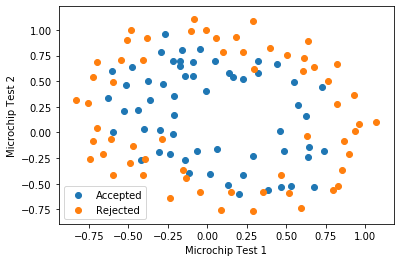

In [237]:
plot_data(data)



plt.show()

In [238]:
theta

array([  3.42964501,   0.48386398,   4.91231738,  -5.26545104,
        -9.33274978,   0.54930023,   5.56131512,   7.84203217,
        11.9276516 ,  -4.88643105,   1.77581295,   3.60514769,
       -11.38065131,   0.44548204, -21.10243103,  -3.19753387,
        -5.25710485,  14.7332184 ,  -9.46287888, -16.71568484,
        12.09586835, -17.96302311,  -8.469576  ,  -2.43171084,
        13.58733954, -19.26104596, -13.7896934 ,   0.83722231])

In [239]:

def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = plt.figure()

    # ====================== YOUR CODE HERE ======================
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    
    # ============================================================

In [240]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.
    Parameters
    ----------
    plotData : func
        A function reference for plotting the X, y data.
    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).
    X : array_like
        The input dataset. X is assumed to be  a either:
            1) Mx3 matrix, where the first column is an all ones column for the intercept.
            2) MxN, N>3 matrix, where the first column is all ones.
    y : array_like
        Vector of data labels of shape (m, ).
    """
    # make sure theta is a numpy array
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(map_feature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

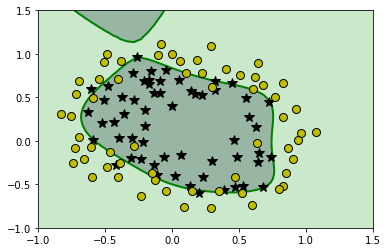

In [241]:
plotDecisionBoundary(plotData, theta, X, y)